In [10]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the general migrants df
# This is going to provide the most important insights for my project

migrants_df = pd.read_excel("/Users/giulianamiranda/Documents/Project_2/project_files/Total_migrants_by_year.xlsx")


In [5]:
# creating a function to clean the columns names of my dataframes

def clean_columns(df): 
    cols = []

    for a in range(len(df.columns)):
        cols.append(df.columns[a].lower().replace(' ', '_'))
    df.columns = cols
    return df


In [6]:
clean_columns(migrants_df)

,year,total,total_europe,spain,france,italy,moldova,united_kingdom,romania,ukraine,...,cape_verde,guine-bissau,mozambique,s._tomé_and_prince,total_america,brazil,total_asia,china,india,nepal
0,1960,20514,18092,10908,1129,733,0,1940,0,0,...,0,0,0,0,1980,611,208,0,0,0
1,1961,19209,16580,9122,1104,678,0,1997,0,0,...,0,0,0,0,2133,621,242,0,0,0
2,1962,19940,17373,10718,1204,687,0,1599,0,0,...,0,0,0,0,2057,599,280,0,0,0
3,1963,19219,16488,9619,1072,475,0,2403,0,0,...,0,0,0,0,2284,592,157,0,0,0
4,1964,18823,15685,7895,1239,723,0,2146,0,0,...,0,0,0,0,2667,695,257,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,477472,202298,14066,19771,18862,4834,26445,30908,29197,...,34444,15960,2999,9023,117965,104504,66941,24856,11340,11487
59,2019,588976,230285,15848,23125,25408,5098,34358,31065,29706,...,37110,18780,3488,10078,168271,150919,87196,27780,17584,16847
60,2020,661607,250263,16981,24935,28159,5182,46238,30052,28621,...,36466,19664,3675,10646,203699,183875,100551,26055,24548,21013
61,2021,698536,255477,18546,26719,30819,5177,41932,28911,27194,...,33988,20346,3795,11176,228147,204669,106847,22777,30248,21545


In [7]:
# I'm starting to take a better look at the data

migrants_df.dtypes

year                  int64
total                 int64
total_europe          int64
spain                 int64
france                int64
italy                 int64
moldova               int64
united_kingdom        int64
romania               int64
ukraine               int64
total_africa          int64
angola                int64
cape_verde            int64
guine-bissau          int64
mozambique            int64
s._tomé_and_prince    int64
total_america         int64
brazil                int64
total_asia            int64
china                 int64
india                 int64
nepal                 int64
dtype: object

In [8]:
# from this initial description of the data, I can already see that some communities (and immigration as a whole)
# grew exponentialy, such as India, Nepal, China and Brazil

# By doing this first step, I also had a first glimpse of what countries could be more 
# interesting for my presentation

migrants_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
year,63.0,1991.000000,18.330303,1960.0,1975.5,1991.0,2006.5,2022.0
total,63.0,195894.523810,195719.654636,0.0,32044.5,113978.0,357948.0,781247.0
total_europe,63.0,73180.761905,74592.976513,0.0,18507.5,33013.0,139418.5,263450.0
spain,63.0,9930.698413,3687.257275,0.0,7516.5,8988.0,11015.0,19508.0
france,63.0,5729.365079,6405.564447,0.0,1639.0,3399.0,6867.5,27512.0
italy,63.0,4385.412698,7354.085370,0.0,810.5,1245.0,4695.0,34039.0
moldova,63.0,2642.539683,5076.604354,0.0,0.0,0.0,4966.0,21067.0
united_kingdom,63.0,11465.619048,10539.533007,0.0,3058.5,8912.0,16604.0,46238.0
romania,63.0,7950.190476,13568.785167,0.0,0.0,30.0,11323.0,39312.0
ukraine,63.0,10004.730159,17106.047678,0.0,0.0,0.0,24144.5,52472.0


In [9]:
# checkin for Null Values
print(migrants_df.isnull().sum())

year                  0
total                 0
total_europe          0
spain                 0
france                0
italy                 0
moldova               0
united_kingdom        0
romania               0
ukraine               0
total_africa          0
angola                0
cape_verde            0
guine-bissau          0
mozambique            0
s._tomé_and_prince    0
total_america         0
brazil                0
total_asia            0
china                 0
india                 0
nepal                 0
dtype: int64


In [12]:
# I wanted to have a visual representation of the evolution of the communities
# I proceeded to create a function to plot their evolution over the years

def plot_nationalites(df):
    countries = ['spain', 'france', 'italy', 'moldova',
       'united_kingdom', 'romania', 'ukraine', 'total_africa', 'angola',
       'cape_verde', 'guine-bissau', 'mozambique', 's._tomé_and_prince',
       'total_america', 'brazil', 'total_asia', 'china', 'india', 'nepal']

    for country in countries:
        plt.figure(figsize=(10, 6))
        plt.plot(df['year'], df[country], marker='o', linestyle='-', label=country)

        plt.xlabel('Year')
        plt.ylabel('Residents')
        plt.title('Evolution by year')
        plt.legend()

        plt.grid(True)
        plt.show()

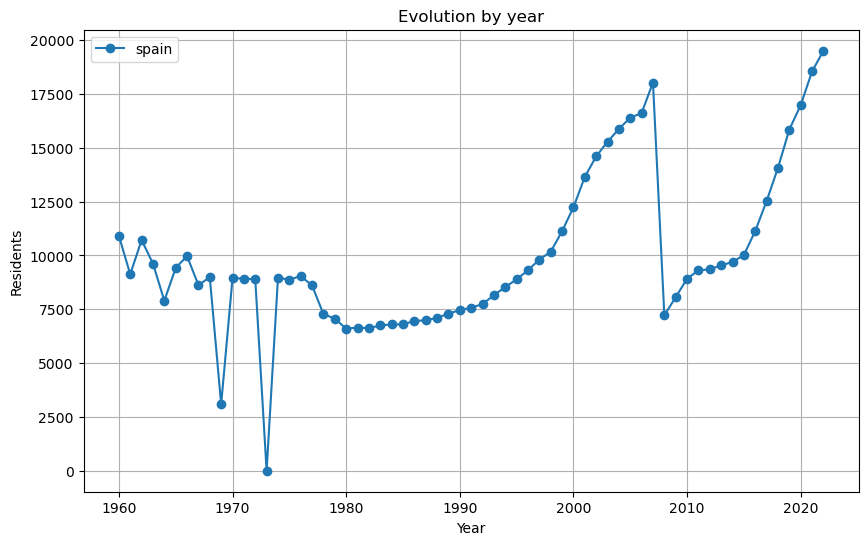

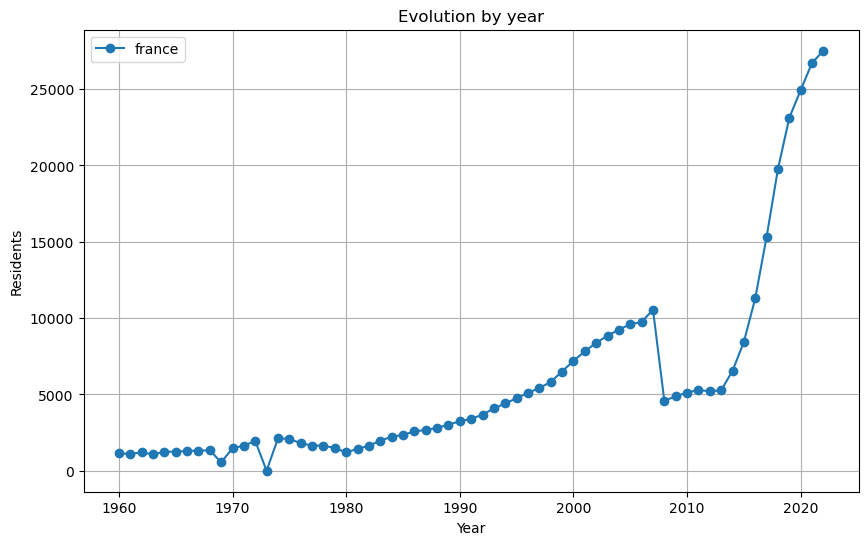

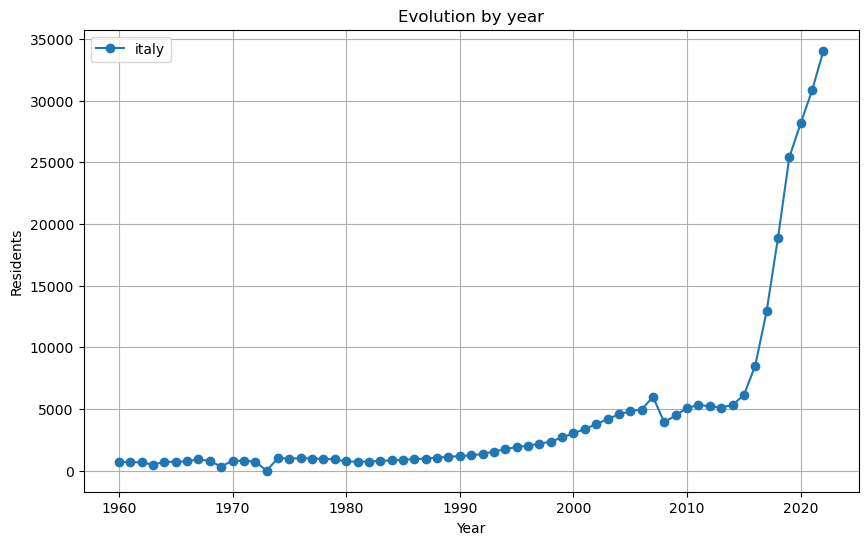

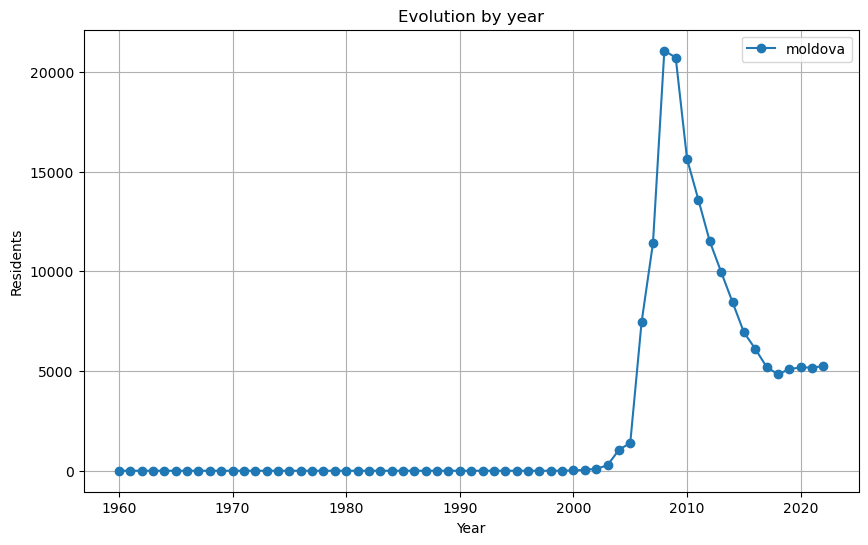

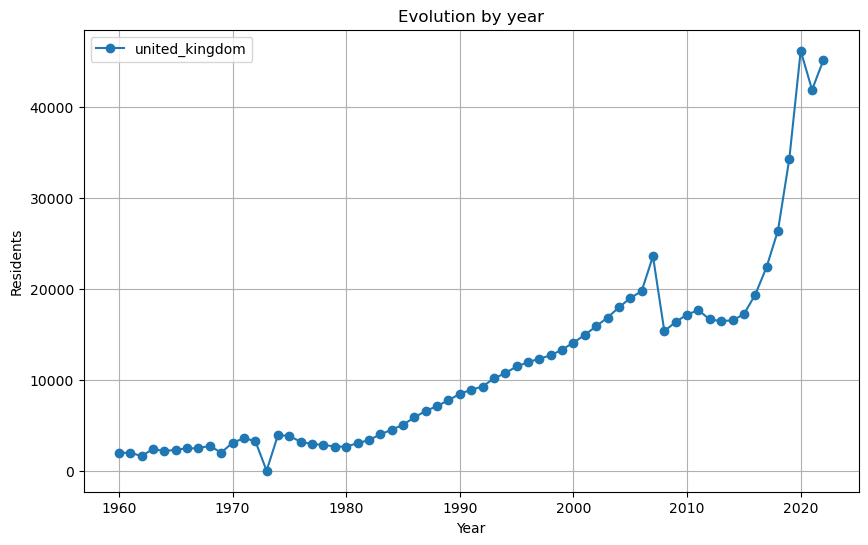

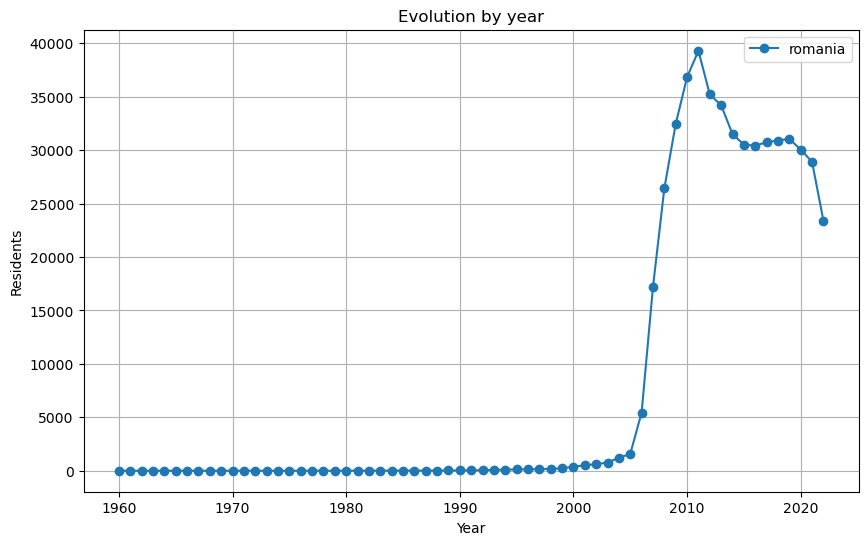

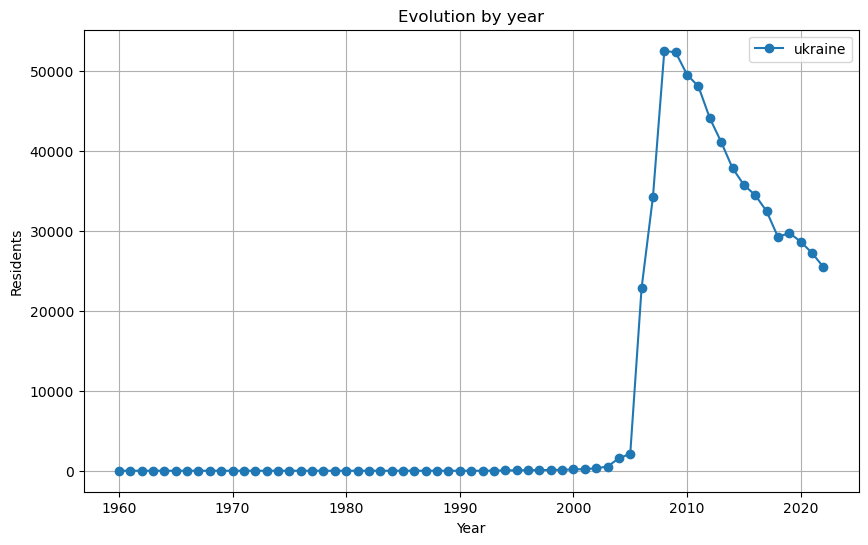

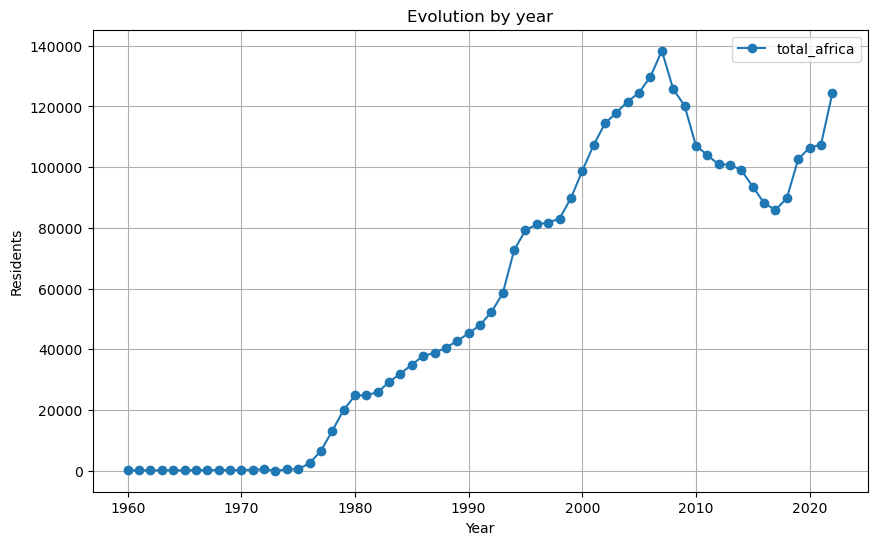

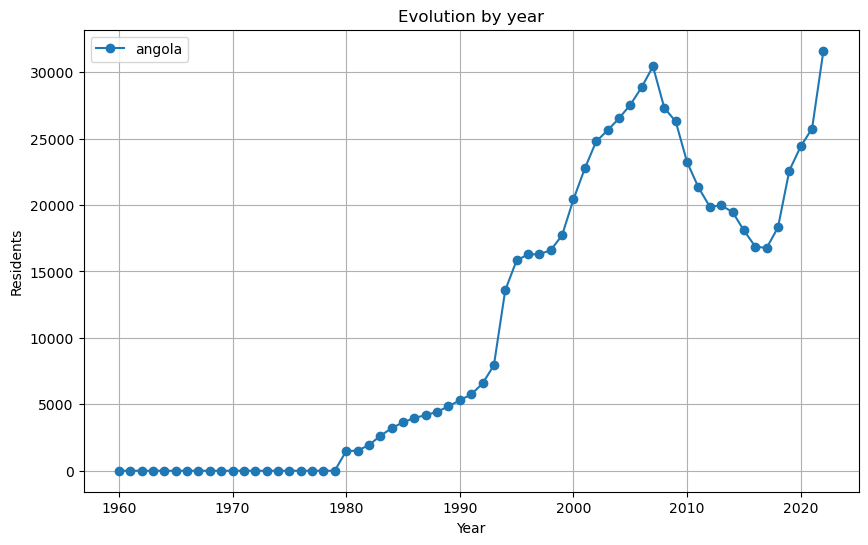

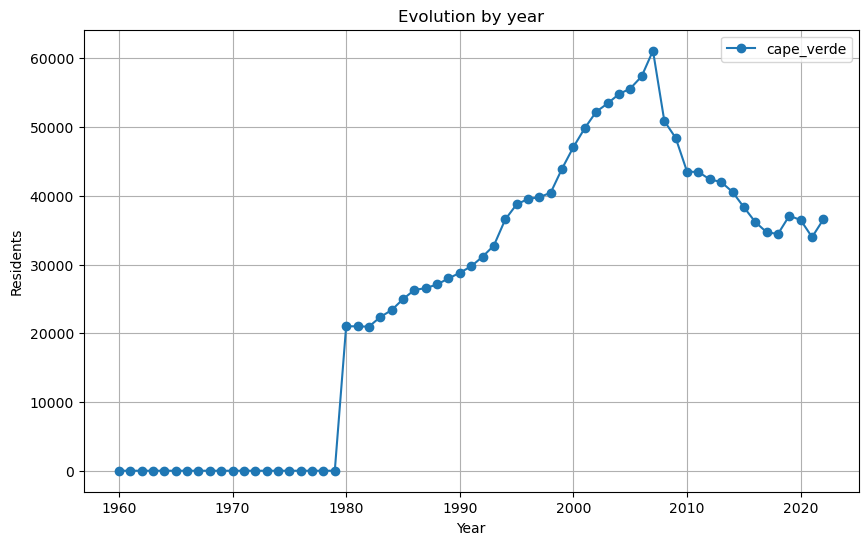

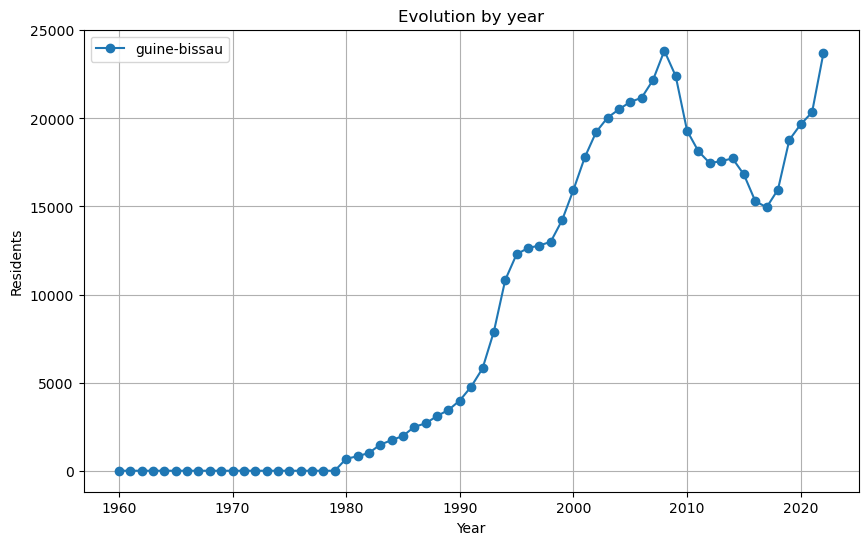

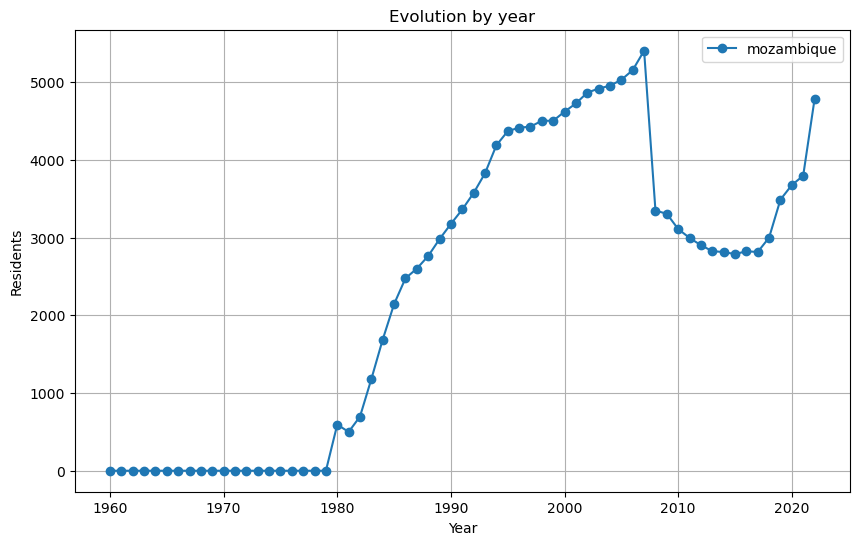

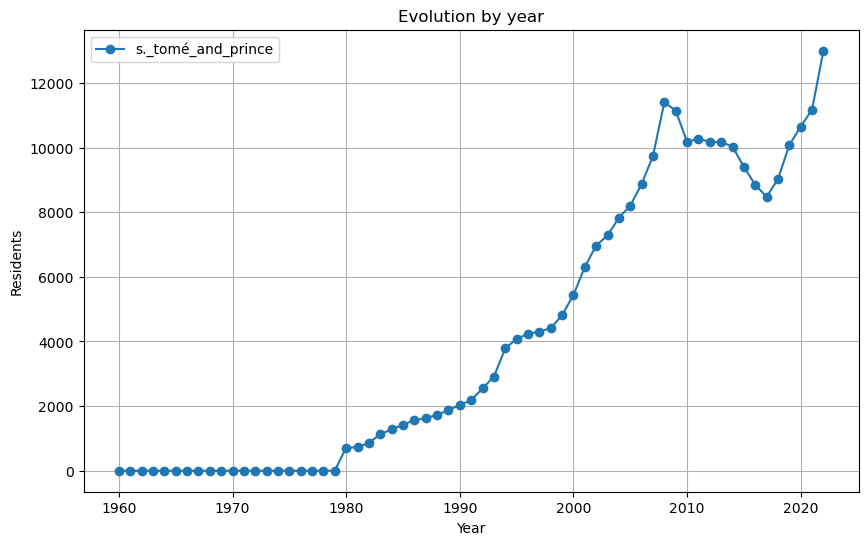

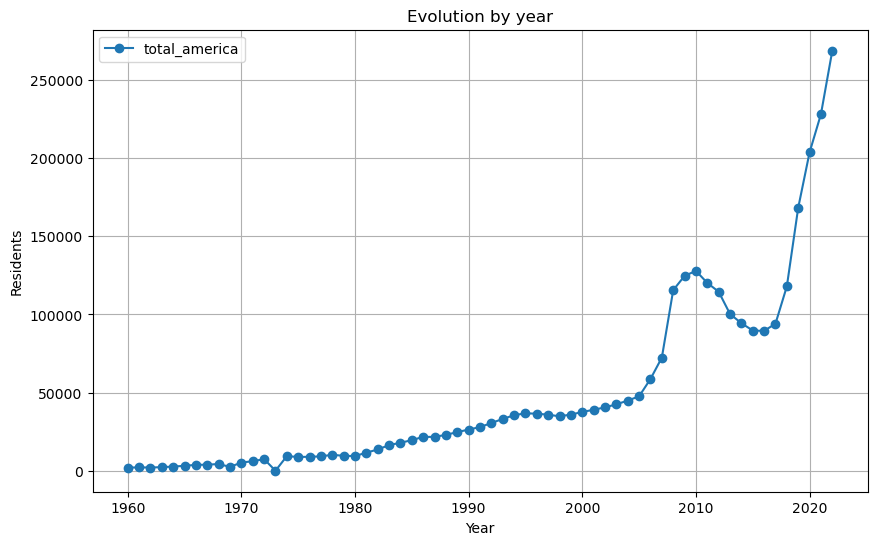

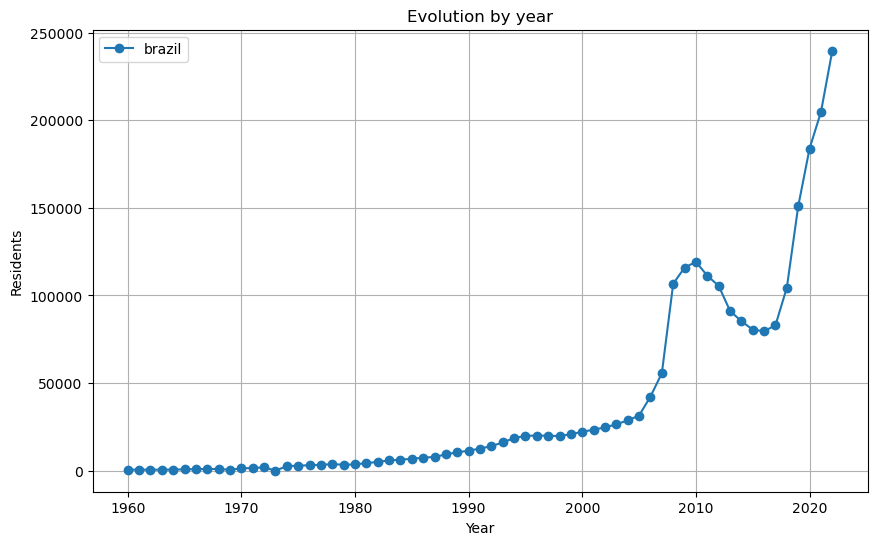

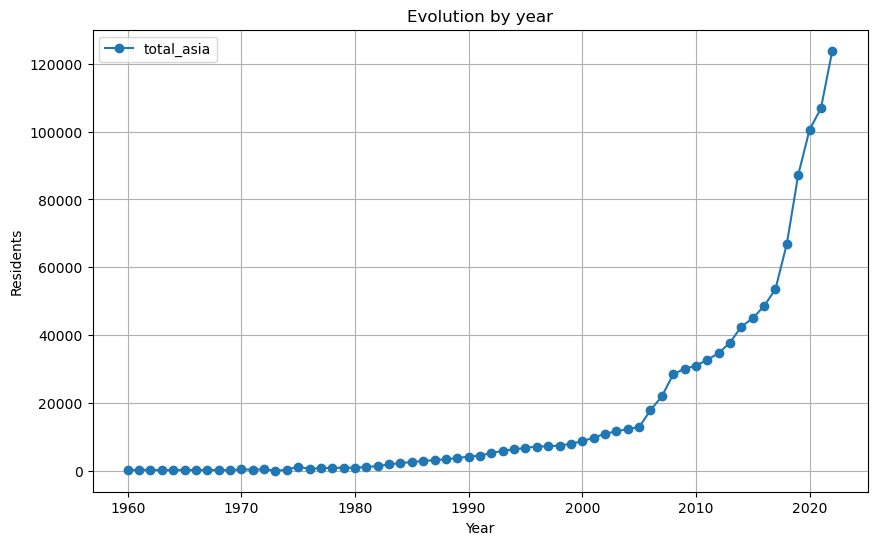

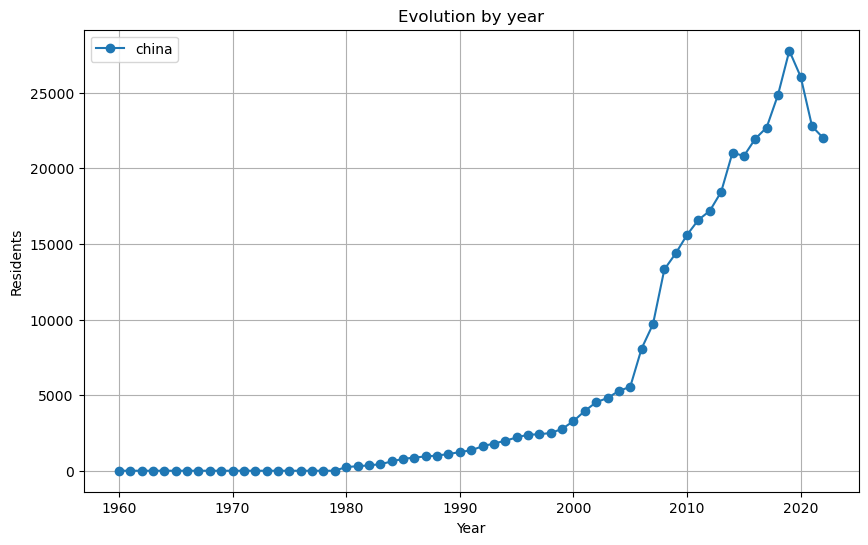

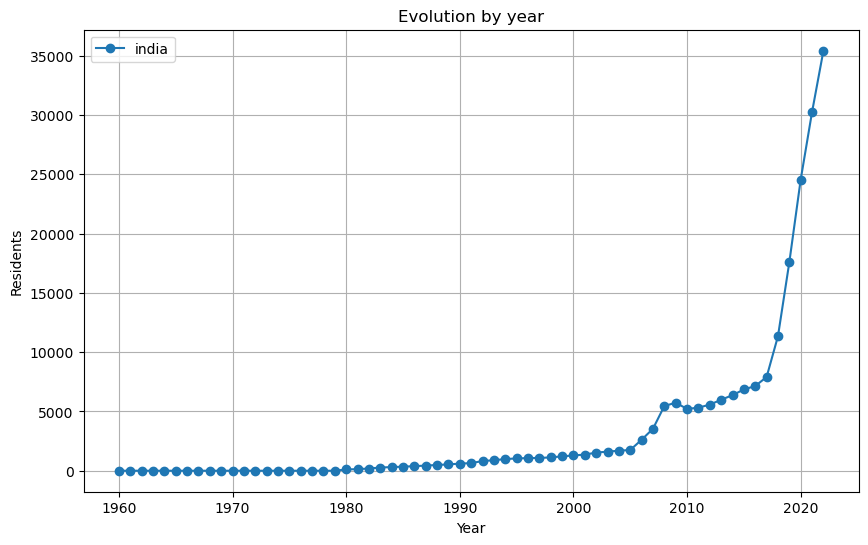

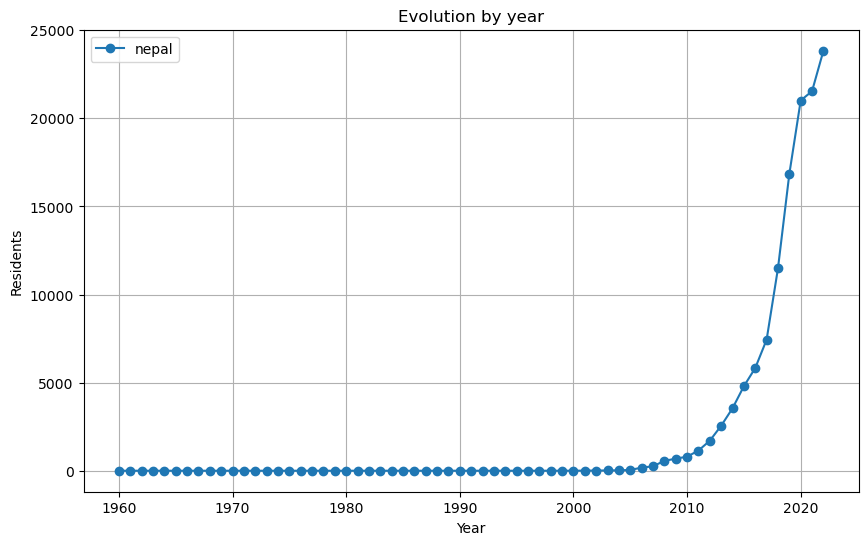

In [13]:
plot_nationalites(migrants_df)

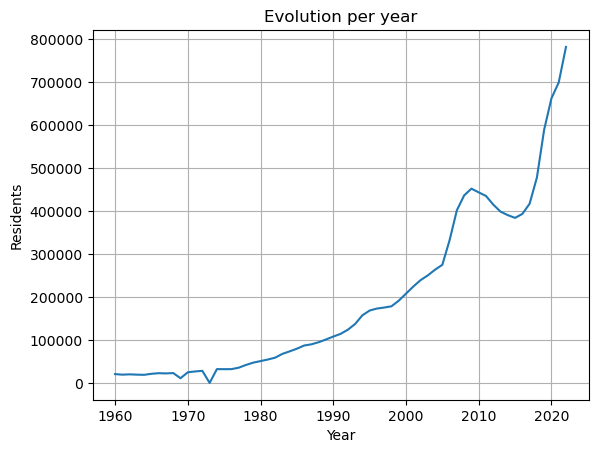

In [14]:
# Now I wanted to see the total migrant evolution

plt.plot(migrants_df['year'], migrants_df['total'])

plt.xlabel('Year')
plt.ylabel('Residents')
plt.title('Evolution per year')

plt.grid(True)
plt.show()

In [17]:
# I imagined that it could be useful to have each country data separated in a different df, and that it would make it 
# easier to create my Tableau dashboard
# Spoiler alert: it did not! 

country_list = ['spain', 'france', 'italy', 'moldova',
             'united_kingdom', 'romania', 'ukraine', 'total_africa', 'angola',
             'cape_verde', 'guine-bissau', 'mozambique', 's._tomé_and_prince',
             'total_america', 'brazil', 'total_asia', 'china', 'india', 'nepal']

# I created a function to extract the info on the countries and also create a xlsx file with the dfs

def countries_dataframes(df, country_list):
    country_dataframes = {}

    for country in country_list:
        df_name = country + '_df'
        country_df = df[['year', country]]
        country_df.columns = ['year', 'total_residents']
        country_df['country'] = 'country'
        country_dataframes[df_name] = country_df

        # 
        excel_file_path = f'{df_name}.xlsx'
        country_df.to_excel(excel_file_path, index=False)
        print(f'DataFrame for {country} salved in {excel_file_path}')

    return country_dataframes


result_country_dataframes = countries_dataframes(migrants_df, country_list)

# file_name = 'total_residents_by_year_country.xlsx'
# result_df .to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['country'] = 'country'
/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['country'] = 'country'
/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

DataFrame for spain salved in spain_df.xlsx
DataFrame for france salved in france_df.xlsx
DataFrame for italy salved in italy_df.xlsx
DataFrame for moldova salved in moldova_df.xlsx
DataFrame for united_kingdom salved in united_kingdom_df.xlsx
DataFrame for romania salved in romania_df.xlsx
DataFrame for ukraine salved in ukraine_df.xlsx
DataFrame for total_africa salved in total_africa_df.xlsx
DataFrame for angola salved in angola_df.xlsx
DataFrame for cape_verde salved in cape_verde_df.xlsx
DataFrame for guine-bissau salved in guine-bissau_df.xlsx
DataFrame for mozambique salved in mozambique_df.xlsx
DataFrame for s._tomé_and_prince salved in s._tomé_and_prince_df.xlsx
DataFrame for total_america salved in total_america_df.xlsx
DataFrame for brazil salved in brazil_df.xlsx
DataFrame for total_asia salved in total_asia_df.xlsx
DataFrame for china salved in china_df.xlsx
DataFrame for india salved in india_df.xlsx
DataFrame for nepal salved in nepal_df.xlsx


/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['country'] = 'country'
/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['country'] = 'country'
/var/folders/40/xch4bqbn70g_b38635j87yv40000gn/T/ipykernel_40204/3214840229.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [ ]:
# Now 
Importing the general migrants df

balance_df = pd.read_excel("/Users/giulianamiranda/Documents/Project_2/project_files/population_balance.xlsx")

cols = []

for a in range(len(balance_df.columns)):
    cols.append(balance_df.columns[a].lower().replace(' ', '_'))
    
balance_df.columns = cols

In [ ]:
balance_df

In [ ]:
import matplotlib.pyplot as plt

def plot_balance(df):
    df['year'] = pd.to_numeric(df['year'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['year'], df['total_balance'], label='Total Balance', marker='o')
    plt.plot(df['year'], df['natural_balance'], label='Natural Balance', marker='o')
    plt.plot(df['year'], df['migratory_balance'], label='Migratory Balance', marker='o')

    # Adicione rótulos e título
    plt.xlabel('Year')
    plt.ylabel('Balance')
    plt.title('Balance Over Years')

    # Adicione a legenda
    plt.legend()

    # Exiba o gráfico
    plt.show()


plot_balance(balance_df)


In [ ]:
gender_df = pd.read_excel("/Users/giulianamiranda/Documents/Project_2/project_files/gender_nationalities.xlsx")

cols = []

for a in range(len(gender_df.columns)):
    cols.append(gender_df.columns[a].lower().replace(' ', '_'))
    
gender_df.columns = cols

gender_df.columns = 'country', 'male', 'female'
gender_df

In [ ]:
# Melt para transformar as colunas 'Homens' e 'Mulheres' em uma coluna 'Gênero' e outra 'Quantidade'
gender_melted = pd.melt(gender_df, id_vars=['country'], value_vars=['male', 'female'], var_name='gender', value_name='total')
gender_melted['total'] = gender_melted['total'].astype(int)
gender_melted


In [ ]:
# Agrupar por Nacionalidade e Gênero e somar as quantidades
gender_grouped = gender_melted.groupby(['country', 'gender']).sum().reset_index()

display(gender_grouped)

In [ ]:
gender_grouped.to_excel('gender_grouped.xlsx', index=False)